In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Data Cleaning

In [3]:
df = pd.read_excel('building_data.xlsx')
df.head

<bound method NDFrame.head of        X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]>

Changing feature names to relevant building attributes

In [4]:
cols = {"X1" : "Relative Compactness","X2" : "Surface Area", "X3" : "Wall Area",
        "X4" :"Roof Area", "X5" :"Overall Height", "X6" :"Orientation", "X7" :"Glazing Area",
        "X8" :"Glazing Area Distribution", "Y1" :"Heating Load", "Y2" :"Cooling Load"}

df.rename(columns = cols, inplace = True)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

Data Visulaization:

Initial Visualization to get a glimpse of relationship between all variables in dataset

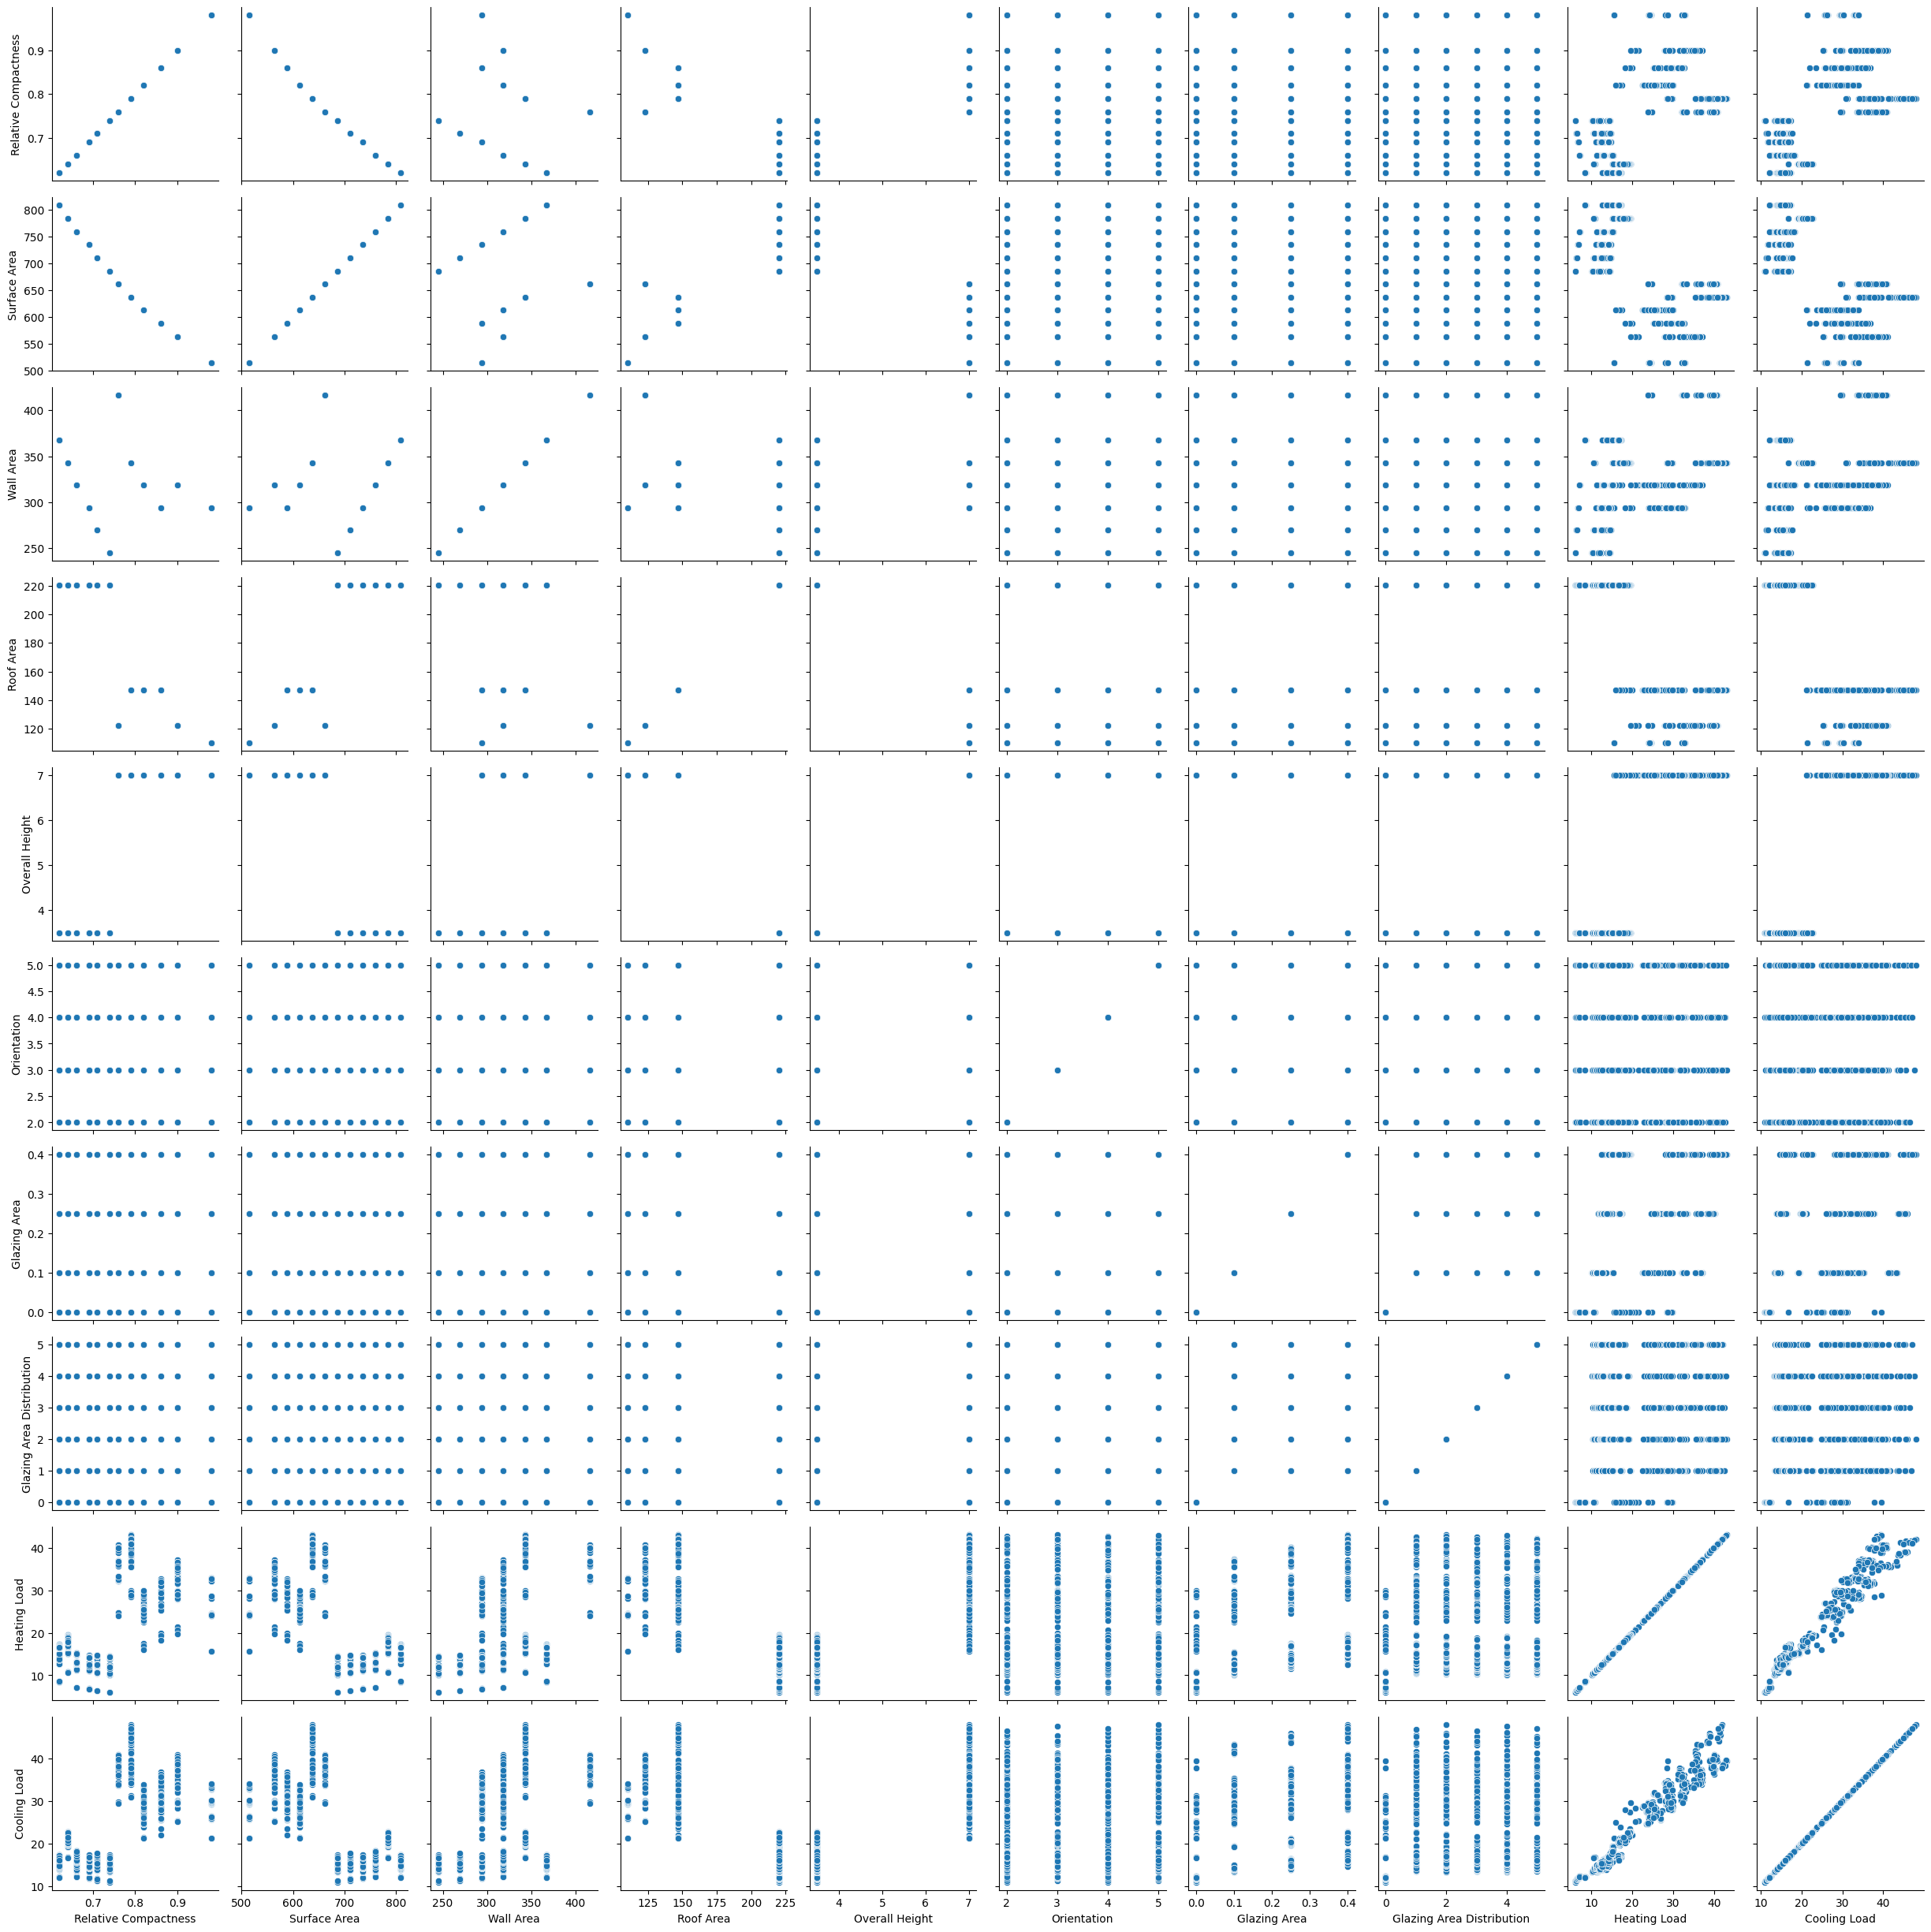

In [6]:
g = sn.PairGrid(df)
g.map(sn.scatterplot)

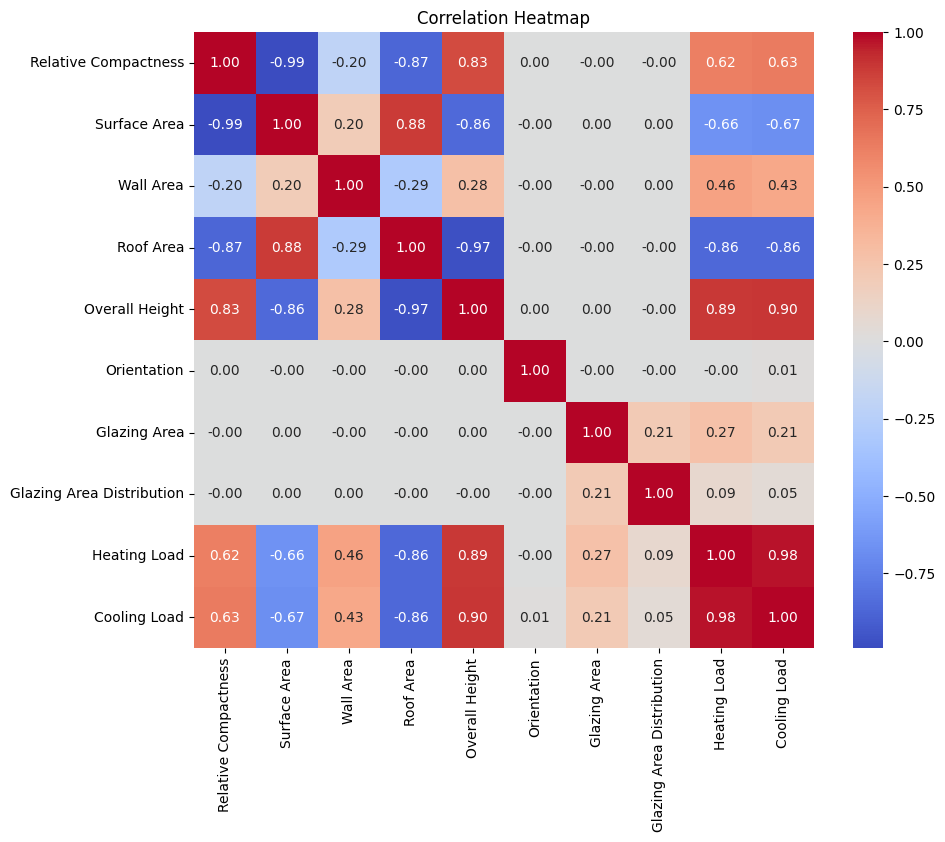

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Scatterplot between feature variable with the greatest correlation to heating load (heating load is a variable that we will predict)

<Axes: xlabel='Overall Height', ylabel='Heating Load'>

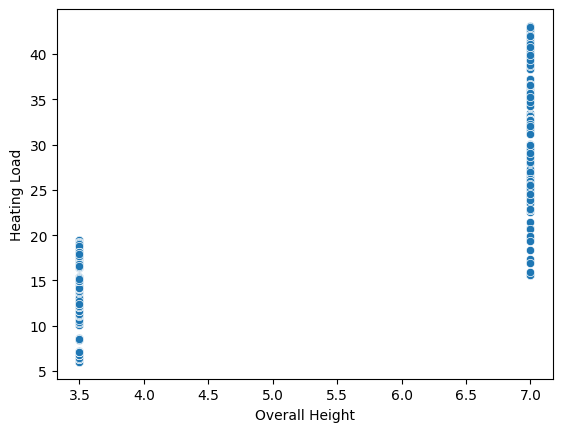

In [43]:
sn.scatterplot(data = df, x = "Overall Height", y="Heating Load")

Scatterplot between feature variable with the greatest correlation to cooling load (cooling load is a variable that we will predict)

<Axes: xlabel='Relative Compactness', ylabel='Cooling Load'>

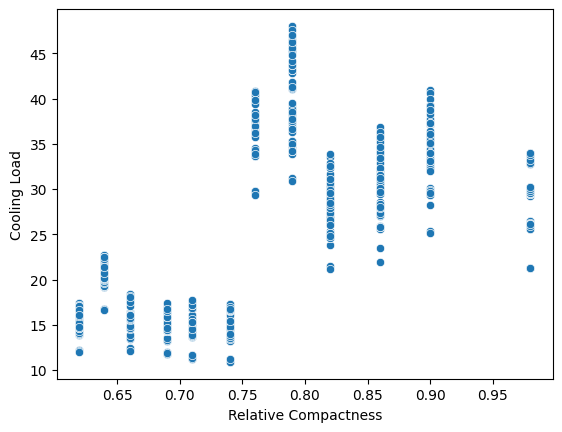

In [9]:
sn.scatterplot(data = df, x = "Relative Compactness", y="Cooling Load")

Distribution of datapoints for the two variables that we will be predicting (Heating Load & Cooling Load)

Text(0.5, 1.0, 'Histogram of Cooling Load')

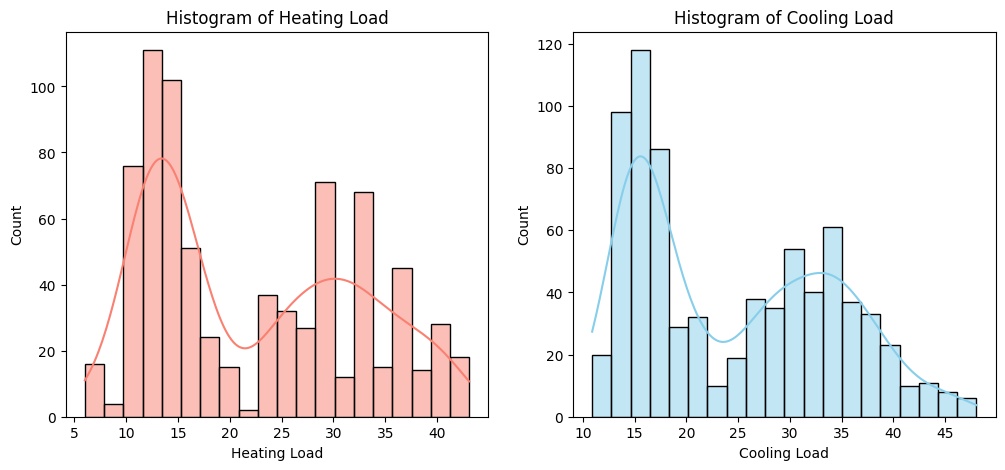

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sn.histplot(df["Heating Load"], bins=20, kde=True, color="salmon")
plt.title("Histogram of Heating Load")

plt.subplot(1, 2, 2)
sn.histplot(df["Cooling Load"], bins=20, kde=True, color="skyblue")
plt.title("Histogram of Cooling Load")

In [11]:
list(df.columns)[:-2]

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Roof Area',
 'Overall Height',
 'Orientation',
 'Glazing Area',
 'Glazing Area Distribution']

Boxplots between all features and heating load (notice that orientation does not impact heating load as the distribution is the same for all orientation values)

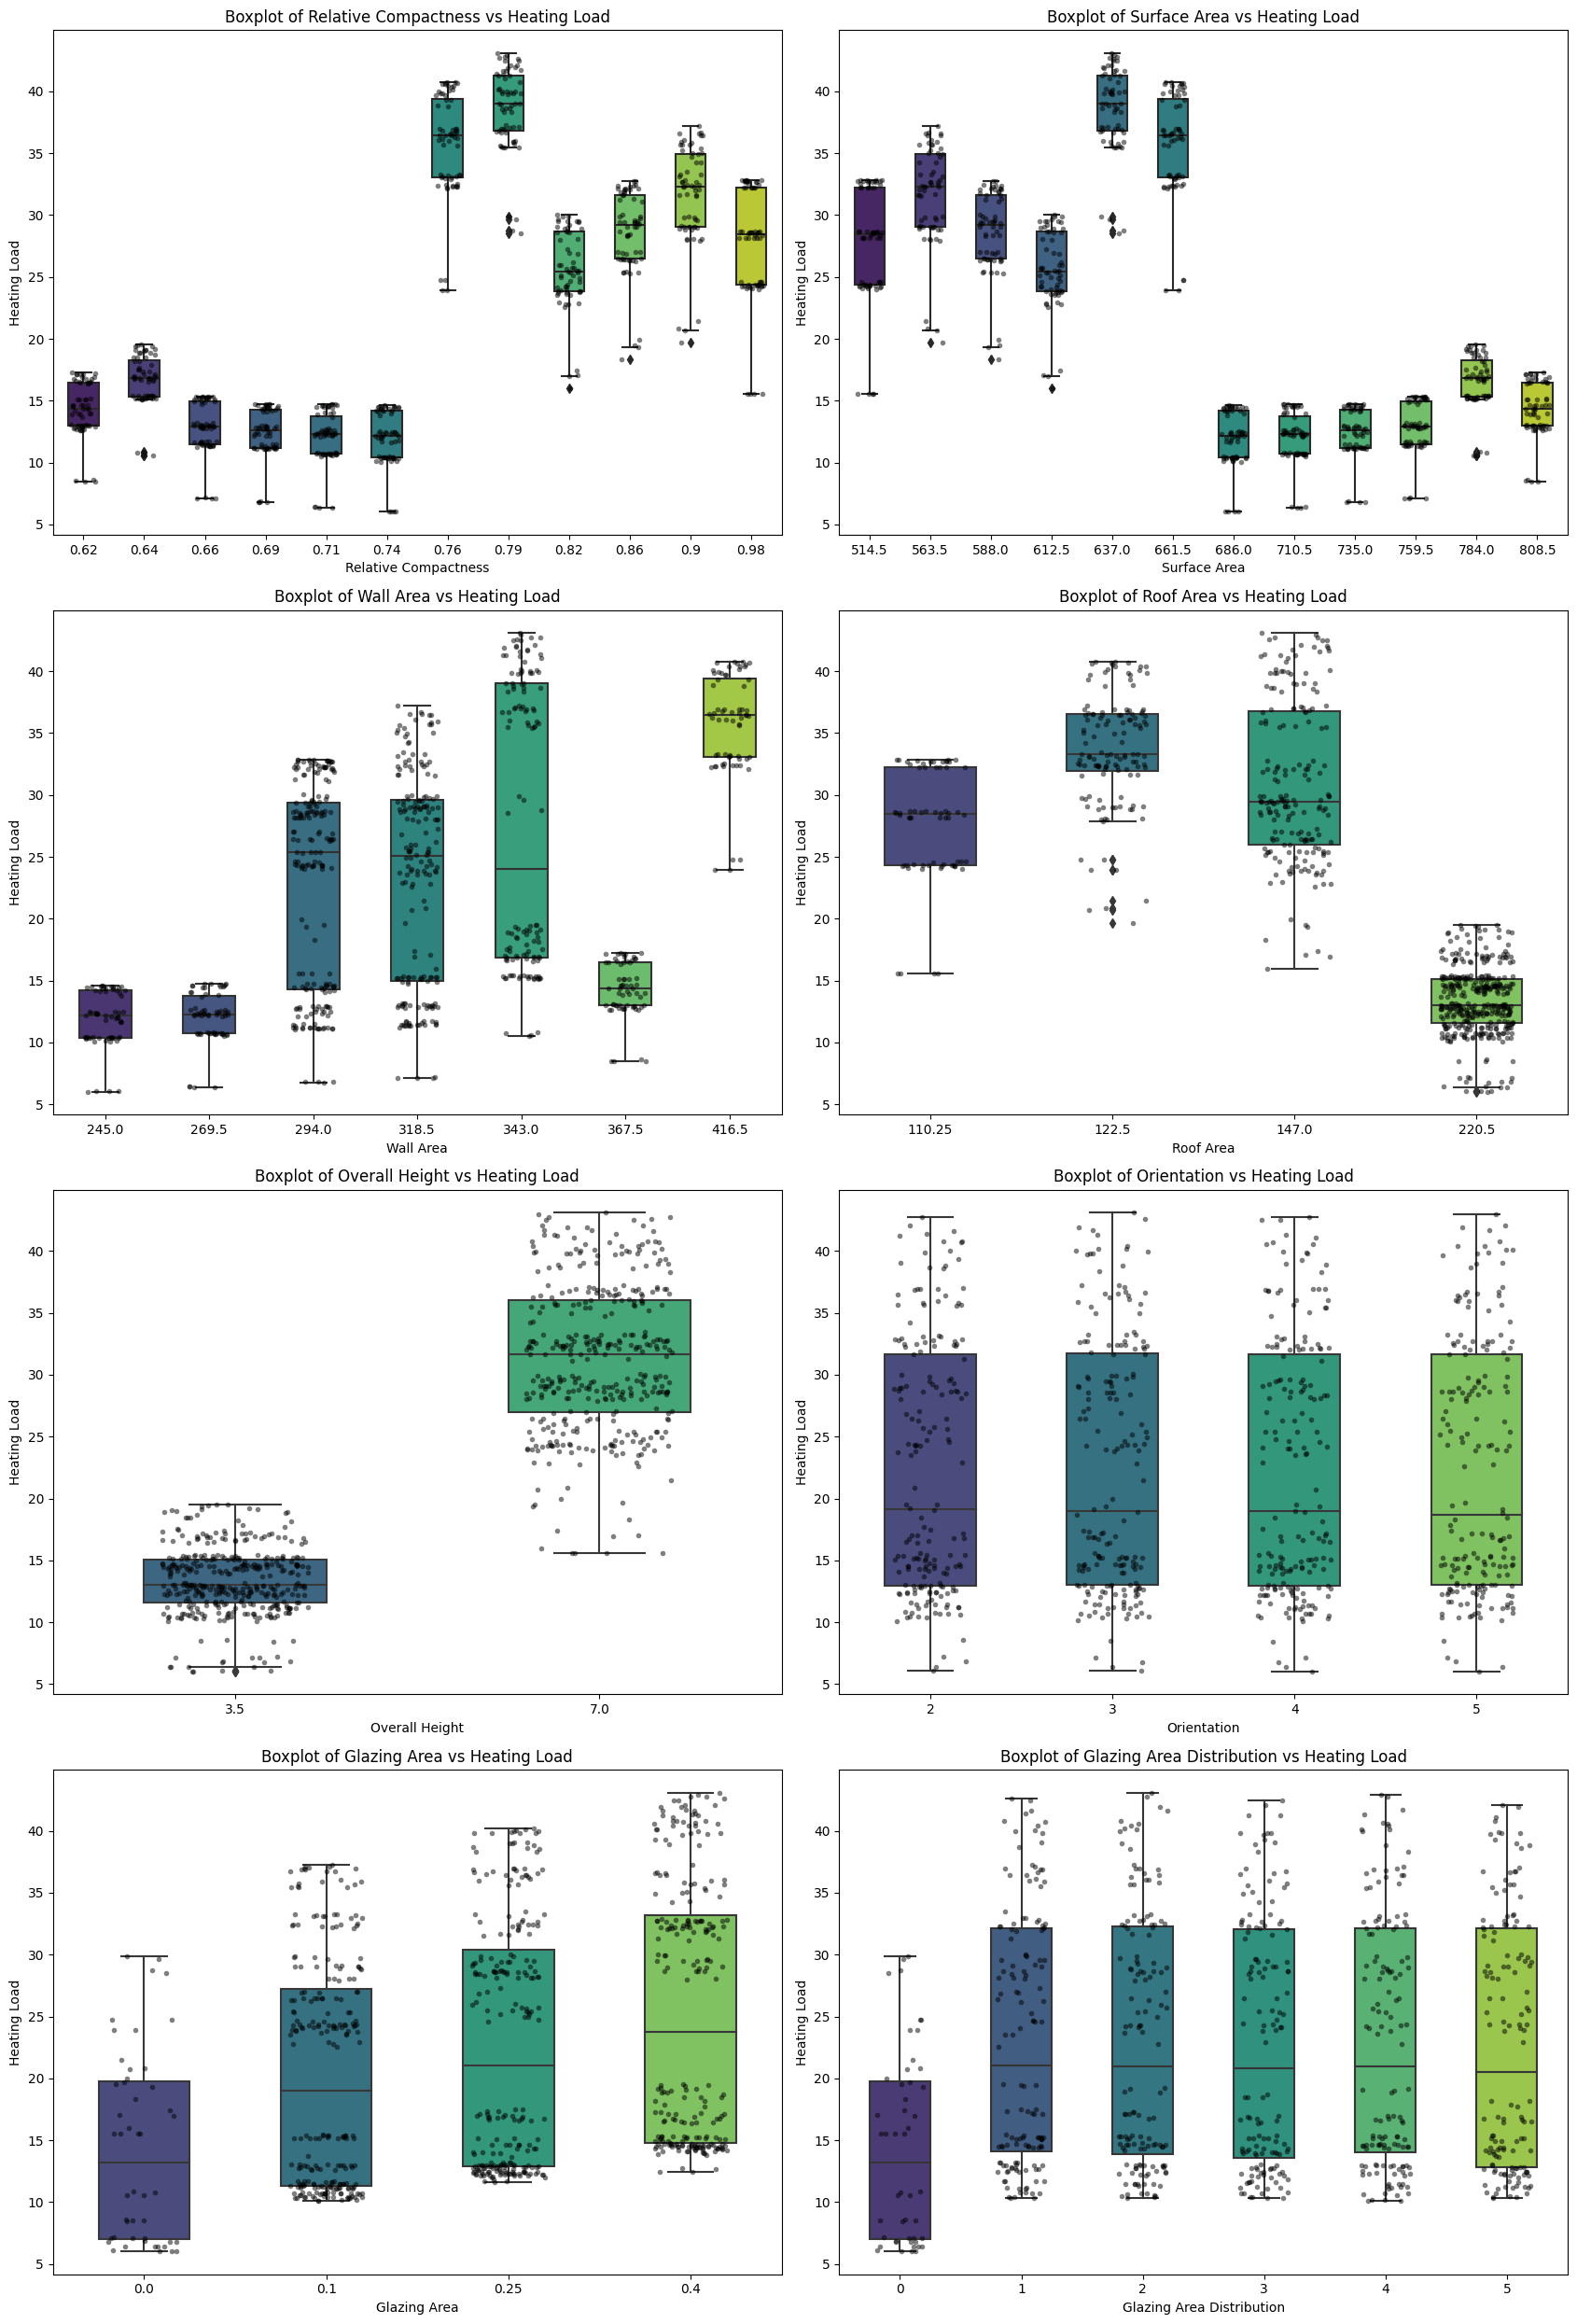

In [12]:
plt.figure(figsize=(17, 25))

for i, feature in enumerate(list(df.columns)[:-2]):
    plt.subplot(4, 2, i + 1)
    sn.boxplot(x=df[feature], y=df["Heating Load"], palette="viridis", width=0.5, linewidth=1.5)
    plt.title(f"Boxplot of {feature} vs Heating Load")

    sn.stripplot(x=df[feature], y=df["Heating Load"], color='black', alpha=0.5, size=4, jitter=0.2)

plt.tight_layout()

Boxplots between all features and cooling load (notice that orientation does not impact cooling load as the distribution is the same for all orientation values)

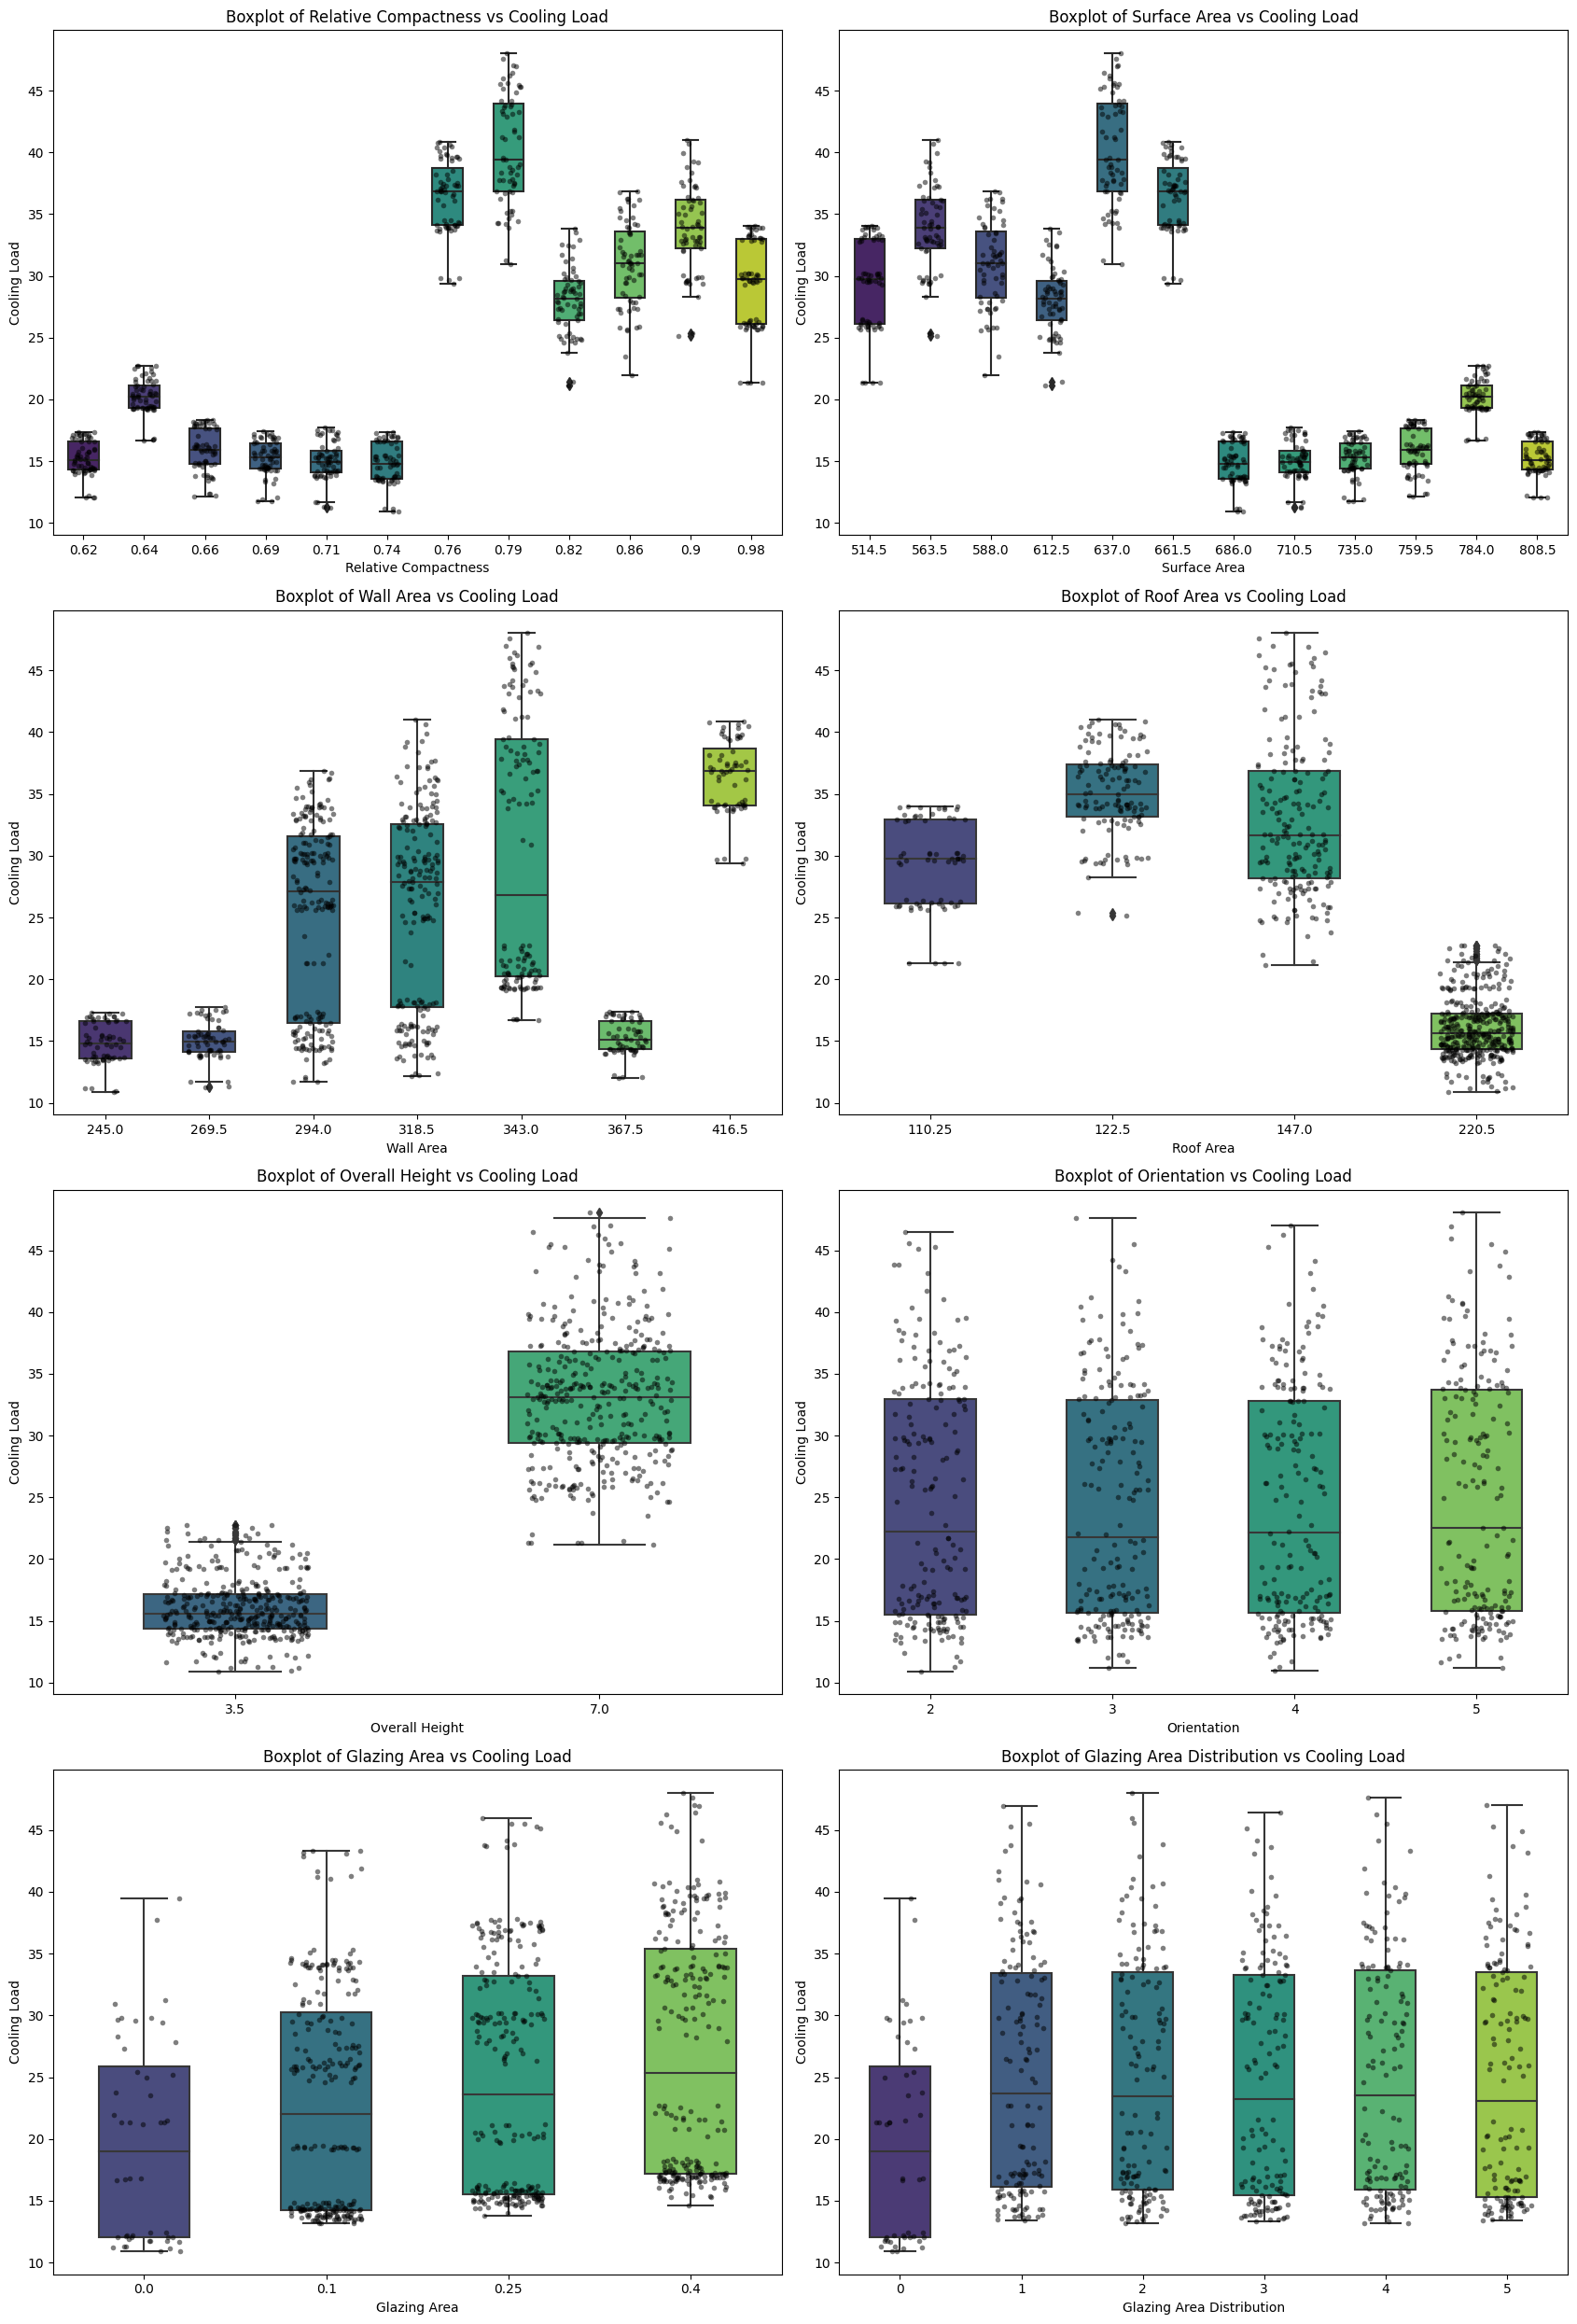

In [13]:
plt.figure(figsize=(17, 25))

for i, feature in enumerate(list(df.columns)[:-2]):
    plt.subplot(4, 2, i + 1)
    sn.boxplot(x=df[feature], y=df["Cooling Load"], palette="viridis", width=0.5, linewidth=1.5)
    plt.title(f"Boxplot of {feature} vs Cooling Load")

    sn.stripplot(x=df[feature], y=df["Cooling Load"], color='black', alpha=0.5, size=4, jitter=0.2)

plt.tight_layout()

Machine Learning/ Predictive Modeling:

Standardizing data to account for large differences in feature components 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

model_feats = df.drop(columns = ['Orientation'], axis = 1)

scaler = StandardScaler()

X = np.array(model_feats[model_feats.columns[:-2]])
y_heating = np.array(model_feats["Heating Load"])
y_cooling = np.array(model_feats["Cooling Load"])



X_standard = scaler.fit_transform(X)
y_standard_heating = scaler.fit_transform(y_heating.reshape(-1, 1))
y_standard_cooling = scaler.fit_transform(y_cooling.reshape(-1, 1))

X_standard.shape, y_standard_heating.shape, y_standard_cooling.shape

((768, 7), (768, 1), (768, 1))

Utilizing a 80-20 train-test-split for the machine-learning data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_heating, y_test_heating = train_test_split(X_standard, y_standard_heating, random_state = 21, test_size = 0.2,)

X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X_standard, y_standard_cooling, random_state = 21, test_size = 0.2,)

X_train.shape, y_train_heating.shape

((614, 7), (614, 1))

Establishing 3 metrics for model evaluation (mean squared error, mean absolute error, and r2)

Created a function to find metrics for each model and store them

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2

Creating data frames to store model performance for the variables that we are predicting (cooling load and heating load)

In [17]:
df_heating_results = pd.DataFrame(columns=['Model for Heating', 'MSE', 'MAE', "R2"])
df_cooling_results = pd.DataFrame(columns=['Model for Cooling', 'MSE', 'MAE', "R2"])

df_heating_results

,Model for Heating,MSE,MAE,R2


We chose 7 regression models to train with our data

In [18]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

rand_seed = 11

models = [GradientBoostingRegressor(random_state = rand_seed), RandomForestRegressor(random_state = rand_seed), 
          LinearRegression(), SVR(), CatBoostRegressor(random_state = rand_seed), 
          KNeighborsRegressor(), DecisionTreeRegressor(random_state = rand_seed)]

Training all the models and storing their performance in the data frames we previously defined

In [19]:
for model in models:
    heating_mse, heating_mae, heating_r2 = train_performance(model, X_train, y_train_heating, X_test, y_test_heating)

    cooling_mse, cooling_mae, cooling_r2 = train_performance(model, X_train, y_train_cooling, X_test, y_test_cooling)

    df_heating_results = pd.concat([df_heating_results, pd.DataFrame([[model.__class__.__name__, 
                                                       heating_mse, heating_mae, heating_r2]], columns=['Model for Heating', 'MSE', 'MAE', "R2"])], axis=0)

    df_cooling_results = pd.concat([df_cooling_results, pd.DataFrame([[model.__class__.__name__, 
                                                       cooling_mse, cooling_mae, cooling_r2]], columns=['Model for Cooling', 'MSE', 'MAE', "R2"])], axis=0)

/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn

Learning rate set to 0.037906
0:	learn: 0.9690217	total: 60.4ms	remaining: 1m
1:	learn: 0.9393239	total: 60.6ms	remaining: 30.2s
2:	learn: 0.9079385	total: 60.7ms	remaining: 20.2s
3:	learn: 0.8776453	total: 60.9ms	remaining: 15.2s
4:	learn: 0.8492267	total: 61.2ms	remaining: 12.2s
5:	learn: 0.8224174	total: 61.3ms	remaining: 10.2s
6:	learn: 0.7956007	total: 61.5ms	remaining: 8.73s
7:	learn: 0.7732579	total: 61.7ms	remaining: 7.65s
8:	learn: 0.7486434	total: 61.9ms	remaining: 6.82s
9:	learn: 0.7250182	total: 62.1ms	remaining: 6.15s
10:	learn: 0.7040028	total: 62.4ms	remaining: 5.61s
11:	learn: 0.6809721	total: 62.6ms	remaining: 5.15s
12:	learn: 0.6595269	total: 62.8ms	remaining: 4.76s
13:	learn: 0.6382057	total: 62.9ms	remaining: 4.43s
14:	learn: 0.6192182	total: 63.2ms	remaining: 4.15s
15:	learn: 0.5990932	total: 63.4ms	remaining: 3.9s
16:	learn: 0.5802637	total: 63.6ms	remaining: 3.68s
17:	learn: 0.5622334	total: 63.8ms	remaining: 3.48s
18:	learn: 0.5470061	total: 64ms	remaining: 3.3s

In [20]:
df_heating_results

,Model for Heating,MSE,MAE,R2
0,GradientBoostingRegressor,0.002412,0.034737,0.997532
0,RandomForestRegressor,0.002596,0.035428,0.997344
0,LinearRegression,0.080589,0.198830,0.917542
0,SVR,0.043495,0.135482,0.955497
0,CatBoostRegressor,0.002522,0.034695,0.997419
0,KNeighborsRegressor,0.011091,0.053247,0.988652
0,DecisionTreeRegressor,0.002851,0.036813,0.997083


In [21]:
df_cooling_results

,Model for Cooling,MSE,MAE,R2
0,GradientBoostingRegressor,0.034791,0.117092,0.964707
0,RandomForestRegressor,0.054168,0.140428,0.945052
0,LinearRegression,0.109331,0.230118,0.889095
0,SVR,0.075295,0.176245,0.923621
0,CatBoostRegressor,0.053500,0.140509,0.945729
0,KNeighborsRegressor,0.061856,0.140959,0.937253
0,DecisionTreeRegressor,0.060012,0.146659,0.939124


In [22]:
def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"

Training a neural network to see if deep learning results in better performance on our data than the other models

the neural network has 2 linear layers with a hidden layer of 8 perceptrons

In [23]:
#simple neural network to predict heating load
import torch
from torch import nn
import torch.optim as optim

X_train, X_test, y_train_heating, y_test_heating = train_test_split(X_standard, y_standard_heating, test_size = 0.2, random_state = 21)

X_train = torch.from_numpy(X_train)
y_train_heating = torch.from_numpy(y_train_heating)
X_test = torch.from_numpy(X_test)
y_test_heating = torch.from_numpy(y_test_heating)

class Load_NN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.linear_layer1 = nn.Linear(in_features = 5, out_features = 5)
        # self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)

        self.layers = nn.Sequential(
            nn.Linear(in_features = 7, out_features = 8, dtype = torch.float64),
            nn.Linear(in_features = 8, out_features = 1, dtype = torch.float64)
        )

    def forward(self, x):
        return self.layers(x)

In [24]:
nn_heat_model = Load_NN()
nn_heat_model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[-0.3518,  0.3108,  0.2349, -0.0709,  0.1566,  0.2951, -0.0057],
                      [ 0.0992, -0.1859, -0.3325,  0.0558, -0.2038, -0.1505,  0.3739],
                      [-0.2820, -0.1164,  0.2424, -0.0091,  0.3545,  0.0448,  0.0943],
                      [-0.2689,  0.0970, -0.3636,  0.3024, -0.2294, -0.2520, -0.2970],
                      [-0.3223,  0.2361,  0.2145, -0.1699,  0.2872,  0.0102,  0.1578],
                      [-0.3098,  0.1199,  0.1564,  0.3256, -0.1245,  0.3345,  0.0176],
                      [-0.3053, -0.0773,  0.0645, -0.1258,  0.1769, -0.2710, -0.3573],
                      [ 0.3044, -0.1816, -0.1572, -0.2727, -0.2538,  0.2771,  0.3081]],
                     dtype=torch.float64)),
             ('layers.0.bias',
              tensor([ 0.3439, -0.2494, -0.3710,  0.0718, -0.0225, -0.0708, -0.1760,  0.0551],
                     dtype=torch.float64)),
             ('layers.1.weight',
              tensor([[

The loss function we chose is mean squared error, and the optimizer is stochastic gradient descent

In [25]:
mae_loss_fn = nn.L1Loss()
mse_loss_fn = nn.MSELoss()
optimizer = optim.SGD(nn_heat_model.parameters(), lr=0.01)

def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"
    
epoch_counts = [i for i in range(200)]
heat_train_loss_track = []
heat_test_loss_track = []


torch.manual_seed(10)

epochs = 200

for epoch in range(epochs):
    nn_heat_model.train()

    y_pred = nn_heat_model(X_train)

    #mae_loss = mae_loss_fn(y_pred, y_train)
    mse_loss = mse_loss_fn(y_pred, y_train_heating)

    optimizer.zero_grad()

    mse_loss.backward()

    optimizer.step()

    nn_heat_model.eval()
    with torch.inference_mode():
        heat_test_preds = nn_heat_model(X_test)

        test_mse_loss = mse_loss_fn(heat_test_preds, y_test_heating)

    heat_train_loss_track.append(mse_loss.item())
    heat_test_loss_track.append(test_mse_loss.item())

    
    print(display_training(epoch, mse_loss, test_mse_loss))


Epoch: 0 | Train Loss: 0.3603372055816625 | Test Loss: 0.34268554531265266
Epoch: 1 | Train Loss: 0.3440012442628479 | Test Loss: 0.3268047668351306
Epoch: 2 | Train Loss: 0.32884714742089965 | Test Loss: 0.31202651721199015
Epoch: 3 | Train Loss: 0.31480454478423653 | Test Loss: 0.29829019536032
Epoch: 4 | Train Loss: 0.3018044118195037 | Test Loss: 0.2855359055571752
Epoch: 5 | Train Loss: 0.28977934565704166 | Test Loss: 0.2737047457737108
Epoch: 6 | Train Loss: 0.27866385426822377 | Test Loss: 0.2627391014035315
Epoch: 7 | Train Loss: 0.26839463709355976 | Test Loss: 0.2525829269833165
Epoch: 8 | Train Loss: 0.25891084075966186 | Test Loss: 0.24318200296700368
Epoch: 9 | Train Loss: 0.250154278447697 | Test Loss: 0.23448415862620273
Epoch: 10 | Train Loss: 0.24206960579444559 | Test Loss: 0.22643945564056003
Epoch: 11 | Train Loss: 0.23460444986450923 | Test Loss: 0.21900032987626875
Epoch: 12 | Train Loss: 0.2277094907107763 | Test Loss: 0.21212169122339028
Epoch: 13 | Train Loss:

We used the same model for heating load to predict the cooling load

In [26]:
#simple neural network to predict heating load
import torch
from torch import nn
import torch.optim as optim

X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X_standard, y_standard_cooling, test_size = 0.2, random_state = 21)

X_train = torch.from_numpy(X_train)
y_train_cooling = torch.from_numpy(y_train_cooling)
X_test = torch.from_numpy(X_test)
y_test_cooling = torch.from_numpy(y_test_cooling)

class Load_NN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.linear_layer1 = nn.Linear(in_features = 5, out_features = 5)
        # self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)

        self.layers = nn.Sequential(
            nn.Linear(in_features = 7, out_features = 8, dtype = torch.float64),
            nn.Linear(in_features = 8, out_features = 1, dtype = torch.float64)
        )

    def forward(self, x):
        return self.layers(x)

In [27]:
nn_cool_model = Load_NN()
nn_cool_model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 1.2448e-01, -9.9145e-06,  1.5994e-01,  3.8063e-02,  3.3440e-01,
                       -8.8038e-02,  1.0035e-01],
                      [ 5.0570e-02, -1.2171e-01,  3.1745e-01,  8.8368e-02,  3.7470e-02,
                       -3.1292e-01,  3.5510e-01],
                      [-1.9070e-01, -3.5227e-02, -2.6089e-01,  1.9819e-01,  7.6654e-02,
                       -3.6883e-02, -2.7904e-01],
                      [-2.5380e-01,  7.7010e-02,  9.4984e-02,  2.8298e-01,  2.7264e-01,
                       -2.3677e-01,  3.0776e-01],
                      [-3.6781e-01,  3.2336e-01, -3.0455e-01, -1.2596e-01,  3.1214e-01,
                        2.2339e-01, -1.8086e-01],
                      [ 2.5227e-01, -4.5374e-02, -2.7263e-01, -3.4496e-01,  1.0287e-01,
                       -3.2931e-02,  3.0220e-01],
                      [-4.1908e-02,  2.4901e-01, -2.3842e-01,  1.3966e-02, -2.8002e-01,
                       -1.4975e-01,  1.1175e-01],
 

In [28]:
mae_loss_fn_cool = nn.L1Loss()
mse_loss_fn_cool = nn.MSELoss()
optimizer = optim.SGD(nn_cool_model.parameters(), lr=0.01)

def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"
    
epoch_counts = [i for i in range(200)]
cool_train_loss_track = []
cool_test_loss_track = []


torch.manual_seed(10)

epochs = 200

for epoch in range(epochs):
    nn_cool_model.train()

    y_pred_cool = nn_cool_model(X_train)

    #mae_loss = mae_loss_fn(y_pred, y_train)
    mse_loss = mse_loss_fn_cool(y_pred_cool, y_train_cooling)

    optimizer.zero_grad()

    mse_loss.backward()

    optimizer.step()

    nn_cool_model.eval()
    with torch.inference_mode():
        cool_test_preds = nn_cool_model(X_test)

        test_mse_loss = mse_loss_fn_cool(cool_test_preds, y_test_cooling)

    cool_train_loss_track.append(mse_loss.item())
    cool_test_loss_track.append(test_mse_loss.item())

    
    print(display_training(epoch, mse_loss, test_mse_loss))

Epoch: 0 | Train Loss: 1.1018270773425456 | Test Loss: 1.0366052353731912
Epoch: 1 | Train Loss: 1.0428767121790685 | Test Loss: 0.9840799098694735
Epoch: 2 | Train Loss: 0.9884693801146734 | Test Loss: 0.9353215340698677
Epoch: 3 | Train Loss: 0.9381145431384882 | Test Loss: 0.8899453996657526
Epoch: 4 | Train Loss: 0.8914042389436831 | Test Loss: 0.8476295391397597
Epoch: 5 | Train Loss: 0.8479960603492689 | Test Loss: 0.8081021625655902
Epoch: 6 | Train Loss: 0.8075998364266374 | Test Loss: 0.7711317200698646
Epoch: 7 | Train Loss: 0.7699671338376868 | Test Loss: 0.736518992952591
Epoch: 8 | Train Loss: 0.7348829371728127 | Test Loss: 0.7040907731638613
Epoch: 9 | Train Loss: 0.7021590349497892 | Test Loss: 0.6736948015925265
Epoch: 10 | Train Loss: 0.6716287564130666 | Test Loss: 0.6451957146307475
Epoch: 11 | Train Loss: 0.6431427886952961 | Test Loss: 0.6184718053550349
Epoch: 12 | Train Loss: 0.6165658646544917 | Test Loss: 0.593412447022727
Epoch: 13 | Train Loss: 0.59177415591

Plotting the training and testing loss for the neural networks for heating and cooling load

We can see an evident decrease in both losses for both heating and cooling load, meaning the model is performing well

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Cooling Load')]

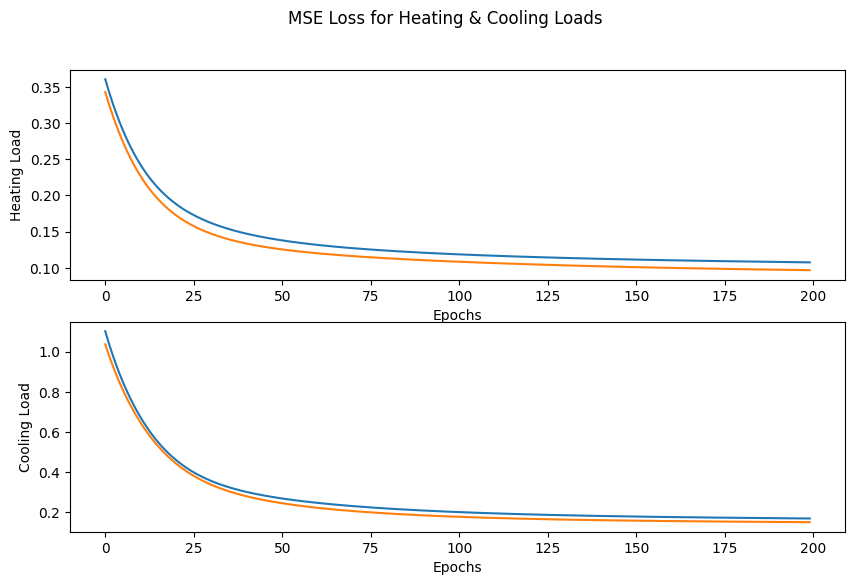

In [29]:
fig, axs = plt.subplots(2, figsize=(10, 6))
fig.suptitle('MSE Loss for Heating & Cooling Loads')
axs[0].plot(epoch_counts, heat_train_loss_track)
axs[0].plot(epoch_counts, heat_test_loss_track)
axs[0].set(xlabel='Epochs', ylabel='Heating Load')
axs[1].plot(epoch_counts, cool_train_loss_track)
axs[1].plot(epoch_counts, cool_test_loss_track)
axs[1].set(xlabel='Epochs', ylabel='Cooling Load')

Computing r2 for the heating and cooling load

In [30]:
from torcheval.metrics import R2Score

r2_heat = R2Score()
r2_heat.update(heat_test_preds, y_test_heating)
r2_heat = r2_heat.compute().numpy().item()
print (f"r^2 for heating load: {r2_heat}")

r^2 for heating load: 0.9008205336751692


In [31]:
r2_cool = R2Score()
r2_cool.update(cool_test_preds, y_test_cooling)
r2_cool = r2_cool.compute().numpy().item()
print (f"r^2 for cooling load: {r2_cool}")

r^2 for cooling load: 0.8482505187093361


In [32]:
df_heating_results.loc[len(df_heating_results)] = ["Neural Network", heat_test_loss_track[-1], "NA", r2_heat]
df_heating_results

,Model for Heating,MSE,MAE,R2
0,GradientBoostingRegressor,0.002412,0.034737,0.997532
0,RandomForestRegressor,0.002596,0.035428,0.997344
0,LinearRegression,0.080589,0.19883,0.917542
0,SVR,0.043495,0.135482,0.955497
0,CatBoostRegressor,0.002522,0.034695,0.997419
0,KNeighborsRegressor,0.011091,0.053247,0.988652
0,DecisionTreeRegressor,0.002851,0.036813,0.997083
7,Neural Network,0.096932,NA,0.900821


In [33]:
df_cooling_results.loc[len(df_heating_results)] = ["Neural Network",  cool_test_loss_track[-1], "NA", r2_cool]
df_cooling_results

,Model for Cooling,MSE,MAE,R2
0,GradientBoostingRegressor,0.034791,0.117092,0.964707
0,RandomForestRegressor,0.054168,0.140428,0.945052
0,LinearRegression,0.109331,0.230118,0.889095
0,SVR,0.075295,0.176245,0.923621
0,CatBoostRegressor,0.053500,0.140509,0.945729
0,KNeighborsRegressor,0.061856,0.140959,0.937253
0,DecisionTreeRegressor,0.060012,0.146659,0.939124
8,Neural Network,0.149595,NA,0.848251


Ordered the models by there R2 performance 

In [34]:
df_heating_results = df_heating_results.sort_values(by='R2', ascending=False).reset_index(drop=True)
df_cooling_results = df_cooling_results.sort_values(by='R2', ascending=False).reset_index(drop=True)

In [35]:
df_heating_results

,Model for Heating,MSE,MAE,R2
0,GradientBoostingRegressor,0.002412,0.034737,0.997532
1,CatBoostRegressor,0.002522,0.034695,0.997419
2,RandomForestRegressor,0.002596,0.035428,0.997344
3,DecisionTreeRegressor,0.002851,0.036813,0.997083
4,KNeighborsRegressor,0.011091,0.053247,0.988652
5,SVR,0.043495,0.135482,0.955497
6,LinearRegression,0.080589,0.19883,0.917542
7,Neural Network,0.096932,NA,0.900821


In [36]:
df_cooling_results

,Model for Cooling,MSE,MAE,R2
0,GradientBoostingRegressor,0.034791,0.117092,0.964707
1,CatBoostRegressor,0.053500,0.140509,0.945729
2,RandomForestRegressor,0.054168,0.140428,0.945052
3,DecisionTreeRegressor,0.060012,0.146659,0.939124
4,KNeighborsRegressor,0.061856,0.140959,0.937253
5,SVR,0.075295,0.176245,0.923621
6,LinearRegression,0.109331,0.230118,0.889095
7,Neural Network,0.149595,NA,0.848251


In [37]:
gradboost_heating = GradientBoostingRegressor().fit(X_train, y_train_heating)
gradboost_cooling = GradientBoostingRegressor().fit(X_train, y_train_cooling)

/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
importance_heating = gradboost_heating.feature_importances_
importance_cooling = gradboost_cooling.feature_importances_

In [39]:
importance_heating

array([0.16282944, 0.04876559, 0.04888458, 0.18778112, 0.46129534,
       0.07347843, 0.0169655 ])

Feature importance for heating load based on the best performing model (GradientBoostingRegressor)

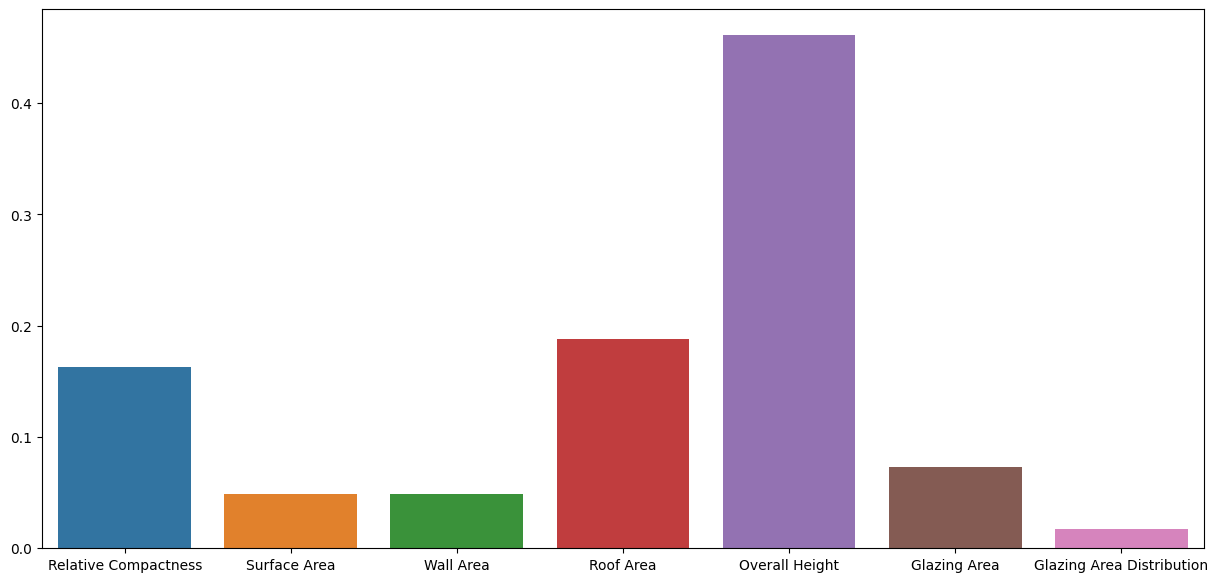

In [40]:
plt.figure(figsize=(15, 7))
sn.barplot(x = list(model_feats.columns[:-2]), y = importance_heating)
plt.show()

In [41]:
importance_cooling

array([0.47221685, 0.30912412, 0.0565722 , 0.10065711, 0.00653499,
       0.05212055, 0.00277418])

Feature importance for cooling load based on the best performing model (GradientBoostingRegressor)

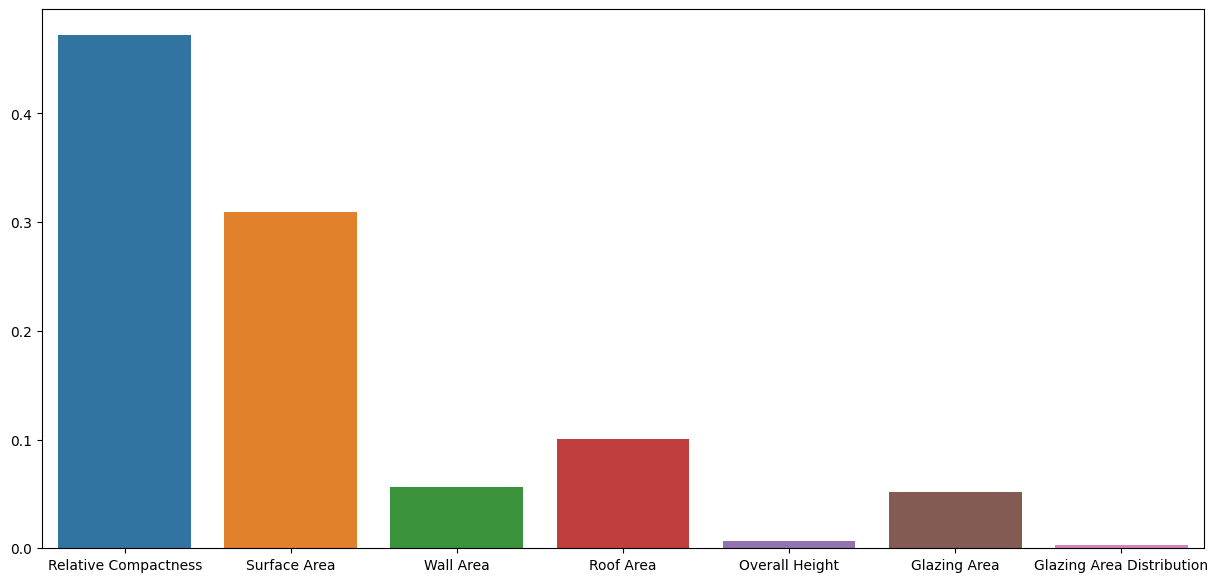

In [42]:
plt.figure(figsize=(15, 7))
sn.barplot(x = list(model_feats.columns[:-2]), y = importance_cooling)
plt.show()